# General Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

random_seed = 1

In [2]:
import os

"""
Launch the script to generate the data.
"""
def generate_data(number_cities, file_name=None):
    string_number_cities = str(number_cities)
    status = os.system('inst_gen.py -s ' + string_number_cities)
    if status == 0 : 
        print('SUCCESS : Data generation with ' + string_number_cities + ' cities')
        if file_name:
            return file_name
        else:
            return 'N' + string_number_cities + '_0'
    else : 
        print('FAILURE : Data generation with ' + string_number_cities + ' cities')
        return ''

"""
Import the data.
"""
def import_data(directory):
    return np.genfromtxt(directory, dtype=None, usecols=range(0,2), skip_header=1)

In [3]:
"""
Visualize cities data.
"""
def plot_data(cities_data):
    city_x = cities_data[:, 0]
    city_y = cities_data[:, 1]

    plt.figure(figsize=(10,8))
    plt.scatter(city_x[0], city_y[0], color='red', label='First city')
    plt.scatter(city_x[1:], city_y[1:], color='black')
    plt.title("Cities Visualization")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

In [4]:
"""
Visualize solution.
"""
def plot_solution(cities_data, solution):    
    solution_cities_in_order = cities_data[solution]

    city_x = solution_cities_in_order[:, 0]
    city_y = solution_cities_in_order[:, 1]

    plt.figure(figsize=(10,8))
    plt.plot(city_x, city_y, color='grey', label='Path')
    plt.scatter(city_x[0], city_y[0], color='red', label='First city')
    plt.scatter(city_x[1], city_y[1], color='orange', label='Second city')
    plt.scatter(city_x[2:-1], city_y[2:-1], color='black', label='Cities')
    plt.title("Solution's path")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()

In [5]:
"""
Distance calculation for all algorithms.
"""
def compute_distance(point_1, point_2):
    distance = ((point_2[0] - point_1[0])**2 + (point_2[1] - point_1[1])**2)**(1/2)
    distance = int(round(distance))
    return distance

# Data Generation

In [6]:
generated_file_name = generate_data(number_cities=15)
cities_data = import_data(generated_file_name)

SUCCESS : Data generation with 15 cities


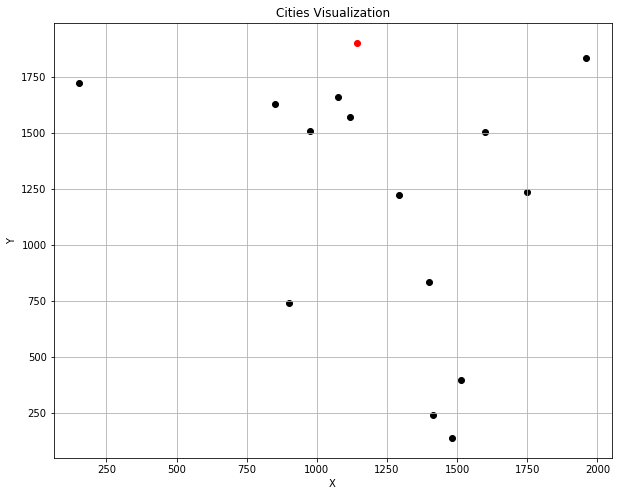

In [7]:
plot_data(cities_data)

# Greedy Algorithm (Algorithme Glouton)

## Definitions

In [8]:
def choose_shortest(current_city, list_cities):
    # current_city : (index,   [x, y])
    # list_cities  : [(index,   [x, y]), ...]
    
    if len(list_cities) == 0:
        return (None, 0)
    
    smallest_distance = float('inf')
    best_city = None
    for city in list_cities:
        distance = compute_distance(current_city[1], city[1])
        if distance < smallest_distance:
            smallest_distance = distance
            best_city = city
    return (best_city, smallest_distance)

In [9]:
# Pseudocode :

# Function Glouton(C :ensemble {candidats}) : S {solution}
#     S <- EMPTY; {solution}
#     while C != EMPTY and NOT solution(S) do
#         x <- choice(C);
#         C <- C \ {x};
#         if NOT illegal(S UNION {x})
#             S <- S UNION {x};
#     if solution(S)
#         RETURN S
#     else 
#         RETURN NONE

def greedy_solve(cities_data, must_compute_time=True):
    
    # If there is less than 2 cities, we return nothing
    if len(cities_data) < 2:
        return None
    
    # Time probe
    if must_compute_time :
        start_time = time.time()
    
    # S <- EMPTY; {solution}
    solution = []
    total_distance = 0
    remaining_cities = list(enumerate(cities_data)) # [(index,   [x, y]), ...]
    
    initial_city = remaining_cities[0] # (index, [x, y])
    current_city = remaining_cities[0] # (index, [x, y])
    
    solution.append(0)
    del remaining_cities[0]
    
    # while C != EMPTY and NOT solution(S) do
    while len(remaining_cities) != 0:
        
        # x <- choice(C);
        selected_city, shortest_distance = choose_shortest(current_city, remaining_cities)
        current_city = selected_city
        total_distance += shortest_distance
        
        # C <- C \ {x};
        remaining_cities.remove(selected_city)
        
        # if NOT illegal(S UNION {x}) (However, there is no illegal value in this problem)
        #     S <- S UNION {x};
        solution.append(selected_city[0])
    
    
    # Return to initial point
    solution.append(initial_city[0])
    total_distance += compute_distance(current_city[1], initial_city[1])
    
    # if not validate_solution(solution):
    # To not increase the computation time, we do not validate the solution inside the algorithm
    
    # if solution(S)
    #     RETURN S
    # else 
    #     RETURN NONE
    if must_compute_time :
        end_time = time.time()
        computation_time = end_time - start_time
        return (solution, total_distance, computation_time)
    else :
        return (solution, total_distance)

## Usage

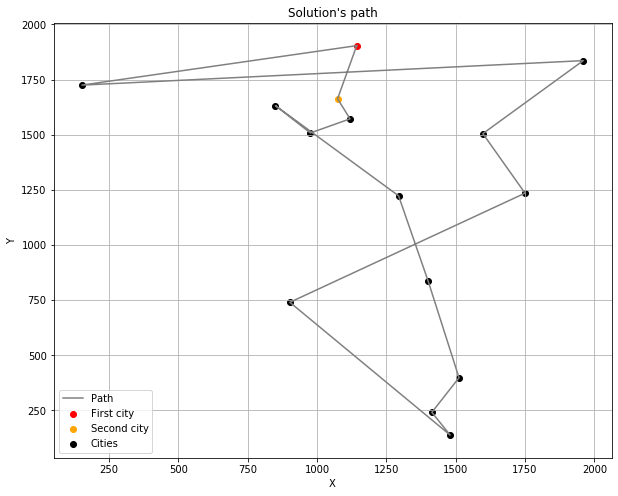

Time used :  0.000997304916381836
Total distance:  7887
Solution reached:  [0, 13, 3, 5, 4, 14, 8, 11, 6, 10, 2, 9, 1, 7, 12, 0]


In [25]:
solution_reached, total_distance, time_used = greedy_solve(cities_data, must_compute_time=True)
plot_solution(cities_data, solution_reached)
print('Time used : ', time_used)
print('Total distance: ', total_distance)
print('Solution reached: ', solution_reached)

# Dynamic Programming Algorithm (Algorithme de programmation dynamique)

## Definitions

In [11]:
def compute_distance(point_1, point_2):
    distance = ((point_2[0] - point_1[0])**2 + (point_2[1] - point_1[1])**2)**(1/2)
    distance = int(round(distance))
    return distance

def choose_shortest(current_city, list_cities):
    # current_city : (index,   [x, y])
    # list_cities  : [(index,   [x, y]), ...]
    
    if len(list_cities) == 0:
        return (None, 0)
    
    smallest_distance = float('inf')
    best_city = None
    for city in list_cities:
        distance = compute_distance(current_city[1], city[1])
        if distance < smallest_distance:
            smallest_distance = distance
            best_city = city
    return (best_city, smallest_distance)

In [12]:
import itertools

def dynamic_programming_solve(cities_data, must_compute_time=True):
    
    # If there is less than 2 cities, we return nothing
    if len(cities_data) < 2:
        return None
    
    # Time probe
    if must_compute_time :
        start_time = time.time()
    
    # S <- EMPTY; {solution}
    solution = []
    total_distance = 0
    remaining_cities = list(enumerate(cities_data)) # [(index,   [x, y]), ...]
    dictionary_cities = { }
    
    initial_city = remaining_cities[0] # (index, [x, y])
    
    solution.append(0)
    del remaining_cities[0]
    
    # Fill the table
    # Example :
    # Input [A, B, C, D, E]
    #
    # ## Fisrst table
    # table[0] := { 
    #               1: {(): X}, 
    #               2: {(): X},
    #               3: {(): X}, 
    #               4: {(): X}
    #             }
    #
    # ## Rest of the tables
    # table[1] := { 
    #               1: {1: None, 2: X,    3: X,    4: X   },
    #               2: {1: x,    2: None, 3: X,    4: X   },
    #               3: {1: x,    2: X,    3: None, 4: X   },
    #               4: {1: x,    2: X,    3: X,    4: None}
    #             }
    #
    # table[2] := { 
    #               1: {(1,2): None, (1,3): None, (1,4): None, (2,3): X,    (2,4): X,    (3,4): X   }
    #               2: {(1,2): None, (1,3): X,    (1,4): X,    (2,3): None, (2,4): None, (3,4): X   }
    #               3: {(1,2): X,    (1,3): None, (1,4): X,    (2,3): None, (2,4): X,    (3,4): None}
    #               4: {(1,2): X,    (1,3): X,    (1,4): None, (2,3): X,    (2,4): None, (3,4): None}
    #             }
    #
    # table[3] := { 
    #               1: {(1,2,3): None, (1,2,4): None, (1,3,4): None, (2,3,4): X   }
    #               2: {(1,2,3): None, (1,2,4): None, (1,3,4): X   , (2,3,4): None}
    #               3: {(1,2,3): None, (1,2,4): X   , (1,3,4): None, (2,3,4): None}
    #               4: {(1,2,3): X   , (1,2,4): None, (1,3,4): None, (2,3,4): X   }
    #             }
    #
    # Where X is in the format : (distance, start_index)
    distance_tables = []
    n_cities = len(cities_data)
    
    ################################
    # Fill the first of the tables #
    ################################
    border_table = {}
    for row_city in remaining_cities:
        
        row_label = row_city[0]
        border_table[row_label] = {}
        
        # table[row_city] := {
        #                      1: {},
        #                      2: {},
        #                      ...
        #                    }
          
        visited_cities = ()
        distance = compute_distance(initial_city[1], row_city[1])
        border_table[row_label][visited_cities] = (distance, 0)

        # table[row_label] := {
        #                      1: {(): (distance, 0)},
        #                      2: {(): (distance, 0)}
        #                      ...
        #                    }

    distance_tables.append(border_table)
    
    ####################################
    # Fill the rest of the first table #
    ####################################
    for current_table in range(1, n_cities - 1):
        
        table = {}
        
        for row_city in remaining_cities:
            row_label = row_city[0]
            
            table[row_label] = {}

            # table[row_city] := {
            #                      1: {},
            #                      2: {},
            #                      ...
            #                    }
  

            cities_list = range(1, n_cities)
            combinations = list(itertools.combinations(cities_list, current_table))
            unique_combinations = set(combinations) # (a, b, ...)

            for included_cities in unique_combinations:
                
                if row_city[0] in included_cities:
                    continue
                
                shortest_distance = float('inf')
                next_city = None
                for city_label in included_cities:
                    cities_visited = included_cities
                    cities_visited = list(cities_visited)
                    cities_visited.remove(city_label)
                    cities_visited = tuple(cities_visited)

                    distance_ij = distance_tables[current_table - 1][city_label][cities_visited][0] 
                    distance_ij += compute_distance(cities_data[row_label], cities_data[city_label])
                    if distance_ij < shortest_distance:
                        shortest_distance = distance_ij
                        next_city = city_label
                
                table[row_label][included_cities] = (shortest_distance, next_city)

                # table[row_city] := {
                #                      1: {(a,b): distance},
                #                      2: {(a,c): distance}
                #                      ...
                #                    }

        distance_tables.append(table)
    
    ###########################################
    # Evaluate potential solutions (distance) #
    ###########################################
    shortest_total_distance = float('inf')
    last_table = distance_tables[-1]
    first_table = border_table
    
    previous_table_entry = (None, None) # (j, S)
    
    for i in range(1, n_cities):
        
        # Last table, cities visited
        cities_visited = list(range(1, n_cities))
        cities_visited.remove(i)
        cities_visited = tuple(cities_visited)
        
        # First table, cities visited
        no_cities_tuple = ()
        
        distance = last_table[i][cities_visited][0] + first_table[i][no_cities_tuple][0]
        
        if distance < shortest_total_distance:
            shortest_total_distance = distance
            previous_visited = cities_visited
            previous_table_entry = i
    
    ###################
    # Trace back path #
    ###################
    solution = [0]
    
    index = 1
    while True:
        solution.append(previous_table_entry)
        previous_table_entry = distance_tables[-index][previous_table_entry][previous_visited][1]
        
        if previous_table_entry == 0:
            solution.append(previous_table_entry)
            break
            
        previous_visited = list(previous_visited)
        previous_visited.remove(previous_table_entry)
        previous_visited = tuple(previous_visited)
        
        index +=1

    # if solution(S)
    #     RETURN S
    if must_compute_time :
        end_time = time.time()
        computation_time = end_time - start_time
        return (solution, shortest_total_distance, computation_time)
    else :
        return (solution, shortest_total_distance)

## Usage

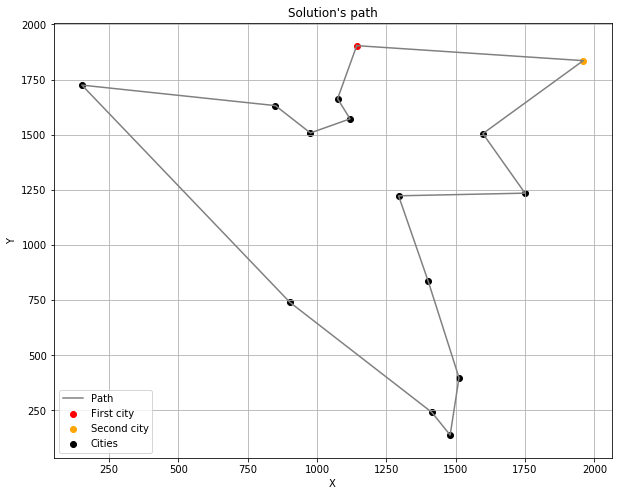

Time used :  8.281464338302612
Total distance:  6658
Solution reached:  [0, 7, 1, 9, 14, 8, 11, 10, 6, 2, 12, 4, 5, 3, 13, 0]


In [26]:
solution_reached, total_distance, time_used = dynamic_programming_solve(cities_data, must_compute_time=True)
plot_solution(cities_data, solution_reached)
print('Time used : ', time_used)
print('Total distance: ', total_distance)
print('Solution reached: ', solution_reached)

# Aproximatif Algorithm (Algorithme Approximatif)

## Definitions

In [14]:
"""
Visualize Tree.
"""
def plot_tree(cities_data, tree):

    city_x = cities_data[:, 0]
    city_y = cities_data[:, 1]
    
    edges_list_x = []
    edges_list_y = []
    for parent_index in tree:
        for edge_index in tree[parent_index]:
            edge_to_plot = []
            edge_to_plot.append(cities_data[parent_index])
            edge_to_plot.append(cities_data[edge_index])

            edge_to_plot = np.array(edge_to_plot)
            edge_x = edge_to_plot[:, 0]
            edge_y = edge_to_plot[:, 1]

            edges_list_x.append(edge_x)
            edges_list_y.append(edge_y)

    plt.figure(figsize=(10,8))
    for i in range(len(edges_list_x)):
        plt.plot(edges_list_x[i], edges_list_y[i], color='grey')
    plt.scatter(city_x[0], city_y[0], color='red', label='First city')
    plt.scatter(city_x[1:], city_y[1:], color='black', label='Cities')
    plt.title("Tree")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()

In [15]:
def make_minimum_spanning_tree(datapoints, root_index):
    # datapoints := [[1, 2], [3, 4], [5, 6], [7,8], [9, 10], ... ]
    # root_index := 0
    
    # tree := { root_index: [node_1, node_2, node_3, ...], parent_index : [node_4, node_5, ...] }
    tree =  {}
    tree[root_index] = []
    
    # visited_indexes := [ 0, 1, 2, 3, 4, ... ]
    visited_indexes = [root_index]
    not_visited_indexes = list(range(0, len(datapoints)))
    del not_visited_indexes[root_index]
    
    while len(not_visited_indexes) > 0:
        shortest_distance = float("inf")
        new_edge_child = None
        new_edge_parent = None
        for visited_index in visited_indexes:
            for not_visited_index in not_visited_indexes:
                distance = compute_distance(datapoints[visited_index], datapoints[not_visited_index])

                if distance < shortest_distance:
                    shortest_distance = distance
                    new_edge_child = not_visited_index
                    new_edge_parent = visited_index
        
        if new_edge_parent in tree:
            tree[new_edge_parent].append(new_edge_child)
        else:
            tree[new_edge_parent] = [new_edge_child]
        
        visited_indexes.append(new_edge_child)
        not_visited_indexes.remove(new_edge_child)
    
    return (tree, root_index)

def do_prefix_path(tree, index):
    if len(tree) == 0:
        return []
    else:
        path = [index]
        if index in tree:
            for child_index in tree[index]:
                path += do_prefix_path(tree, child_index)
                path += [index]
        
        return path

def prune_prefix_path(path):
    encontered_values = []
    new_path = []
    initial_value = path[0]
    for value in path:
        if value in encontered_values:
            continue
        elif value == initial_value:
            new_path.append(value)
        else:
            new_path.append(value)
            encontered_values.append(value)
    
    return new_path

In [16]:
# Pseudocode :

# 1. Compute PRIM algorithm to get a Minimum Spanning Tree
# 2. Do a prefix path on the tree
# 3. Remove repetitions on the tree
# 4. Compute total distance

def approximative_solve(cities_data, must_compute_time=True, initial_point=0):
    
    # If there is less than 2 cities, we return nothing
    if len(cities_data) < 2:
        return None
    
    # Time probe
    if must_compute_time :
        start_time = time.time()
    
    # 1. Compute PRIM algorithm to get a Minimum Spanning Tree
    tree, index = make_minimum_spanning_tree(cities_data, initial_point)
    
    # 2. Do a prefix path on the tree
    prefix_path = do_prefix_path(tree, index)
    
    # 3. Remove repetitions on the tree
    solution = prune_prefix_path(prefix_path)
    
    # 4. Compute total distance
    point_oder = cities_data[solution]
    total_distance = 0
    for i in range(0, len(point_oder) - 1):
        total_distance += compute_distance(point_oder[i], point_oder[1+1])
    
    # if solution(S)
    #     RETURN S
    # else 
    #     RETURN NONE
    if must_compute_time :
        end_time = time.time()
        computation_time = end_time - start_time
        return (solution, total_distance, computation_time)
    else :
        return (solution, total_distance)

## Usage

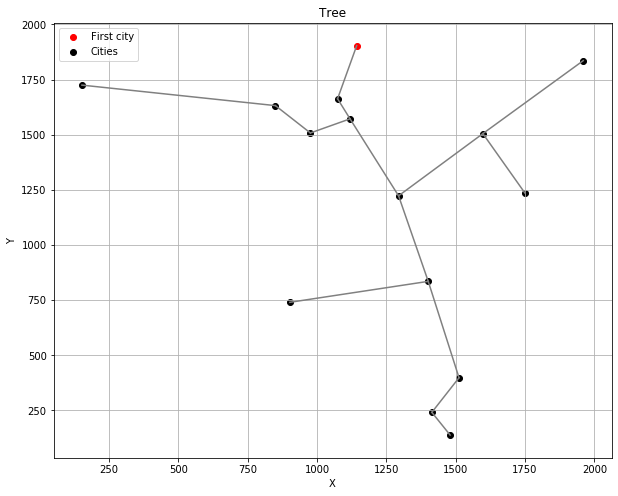

In [17]:
tree, root_index = make_minimum_spanning_tree(cities_data, 0)
plot_tree(cities_data, tree)

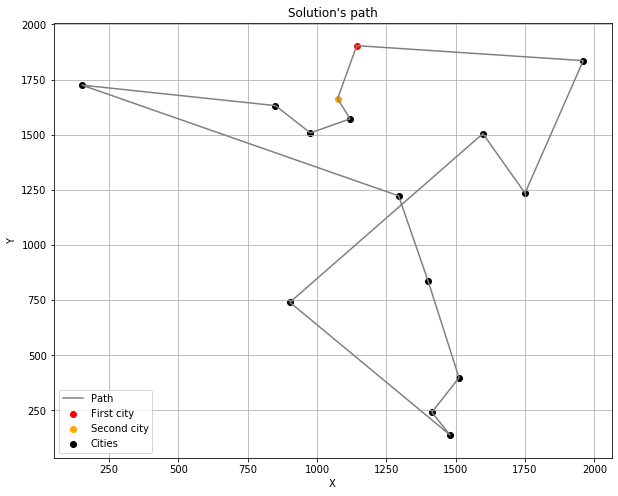

Time used :  0.005945682525634766
Total distance:  10046
Solution reached:  [0, 13, 3, 5, 4, 12, 14, 8, 11, 6, 10, 2, 1, 9, 7, 0]


In [27]:
solution_reached, total_distance, time_used = approximative_solve(cities_data, must_compute_time=True)
plot_solution(cities_data, solution_reached)
print('Time used : ', time_used)
print('Total distance: ', total_distance)
print('Solution reached: ', solution_reached)

# Tests

## Data generation

In [19]:
# Data sizes
SIZES = list(range(3, 21))

In [20]:
# Generate files
cities_data_list = []
for size in SIZES:
    generated_file_name = generate_data(number_cities=size)
    cities_data_list.append(import_data(generated_file_name))

SUCCESS : Data generation with 3 cities
SUCCESS : Data generation with 4 cities
SUCCESS : Data generation with 5 cities
SUCCESS : Data generation with 6 cities
SUCCESS : Data generation with 7 cities
SUCCESS : Data generation with 8 cities
SUCCESS : Data generation with 9 cities
SUCCESS : Data generation with 10 cities
SUCCESS : Data generation with 11 cities
SUCCESS : Data generation with 12 cities
SUCCESS : Data generation with 13 cities
SUCCESS : Data generation with 14 cities
SUCCESS : Data generation with 15 cities
SUCCESS : Data generation with 16 cities
SUCCESS : Data generation with 17 cities
SUCCESS : Data generation with 18 cities
SUCCESS : Data generation with 19 cities
SUCCESS : Data generation with 20 cities


## Performance calculation

In [24]:
list_time_greedy = []
list_time_dynamic = []
list_time_approximative = []

print('Greedy (G), Dynamic Programing (DP), Approximative (A)')
for test_data in cities_data_list:
    solution_greedy, distance_greedy, time_greedy = greedy_solve(cities_data, must_compute_time=True)
    solution_dynamic, distance_dynamic, time_dynamic = dynamic_programming_solve(cities_data, must_compute_time=True)
    solution_approximative, distance_approximative, time_approximative = approximative_solve(cities_data, must_compute_time=True)
    
    
    list_time_greedy.append(time_greedy)
    list_time_dynamic.append(time_dynamic)
    list_time_approximative.append(time_approximative)
 
    print('For ', len(test_data), ' city(ies) --> G:', time_greedy, '; DP:', time_dynamic, '; A: ', time_approximative)

Greedy (G), Dynamic Programing (DP), Approximative (A)
For  3  city(ies) --> G: 0.001993894577026367 ; DP: 8.45731782913208 ; A:  0.004985809326171875
For  4  city(ies) --> G: 0.0009980201721191406 ; DP: 8.255603313446045 ; A:  0.005028963088989258
For  5  city(ies) --> G: 0.0 ; DP: 8.319393873214722 ; A:  0.004980325698852539
For  6  city(ies) --> G: 0.0009980201721191406 ; DP: 8.104334831237793 ; A:  0.004987478256225586
For  7  city(ies) --> G: 0.0009975433349609375 ; DP: 8.714564800262451 ; A:  0.0069768428802490234
For  8  city(ies) --> G: 0.0009982585906982422 ; DP: 8.184053659439087 ; A:  0.0059816837310791016
For  9  city(ies) --> G: 0.0 ; DP: 8.558161973953247 ; A:  0.004986286163330078
For  10  city(ies) --> G: 0.0009970664978027344 ; DP: 8.575648784637451 ; A:  0.004986286163330078
For  11  city(ies) --> G: 0.0009975433349609375 ; DP: 8.785784006118774 ; A:  0.0069811344146728516
For  12  city(ies) --> G: 0.001998424530029297 ; DP: 8.557625532150269 ; A:  0.00697827339172363

C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


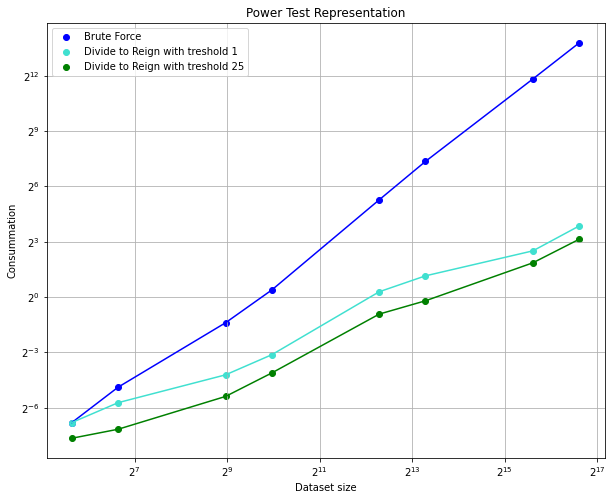

In [120]:
plt.figure(figsize=(10,8))

plt.xscale("log", basex=2)
plt.yscale("log", basey=2)

# Brute force Algorithm
plt.plot(SIZES, list_time_brute_force, color='blue')
plt.scatter(SIZES, list_time_brute_force, color='blue', label='Brute Force')

# Divide to reign Algorithm with threshold 1
plt.plot(SIZES, list_time_divide_to_reign_1, color='turquoise')
plt.scatter(SIZES, list_time_divide_to_reign_1, color='turquoise', label='Divide to Reign with treshold 1')

# Divide to reign Algorithm with threshold THRESHOLD
plt.plot(SIZES, list_time_divide_to_reign_2, color='green')
plt.scatter(SIZES, list_time_divide_to_reign_2, color='green', label='Divide to Reign with treshold '+ str(THRESHOLD))

plt.title("Power Test Representation")
plt.xlabel("Dataset size")
plt.ylabel("Consummation")
plt.legend()
plt.grid()
plt.show()

## Power test

In [115]:
def perform_power_test(x_exp, y_exp, label):
    
    # solve linear system
    x = np.log2(x_exp)
    y = np.log2(y_exp)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    y_plot = m * x + c
    
    # Plot data
    plt.figure(figsize=(10,8))
    
    # Experimental data
    plt.plot(np.log2(x_exp), np.log2(y_exp), color='blue')
    plt.scatter(np.log2(x_exp), np.log2(y_exp), color='blue', label=label)
    
    # Fit linear
    plt.plot(x, y_plot, color='red', label=str(m) + ' x + ' + str(c))
    

    plt.title("Power Test Representation")
    plt.xlabel("Dataset size")
    plt.ylabel("Consummation (power of 2)")
    plt.legend()
    plt.grid()
    plt.show()

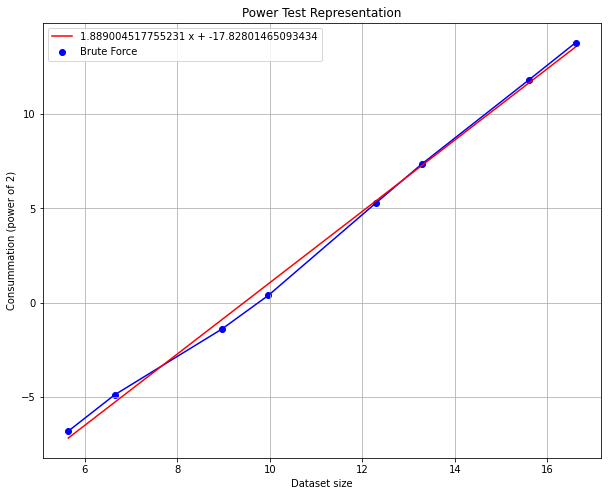

In [116]:
perform_power_test(x_exp=SIZES, y_exp=list_time_brute_force, label='Brute Force')   

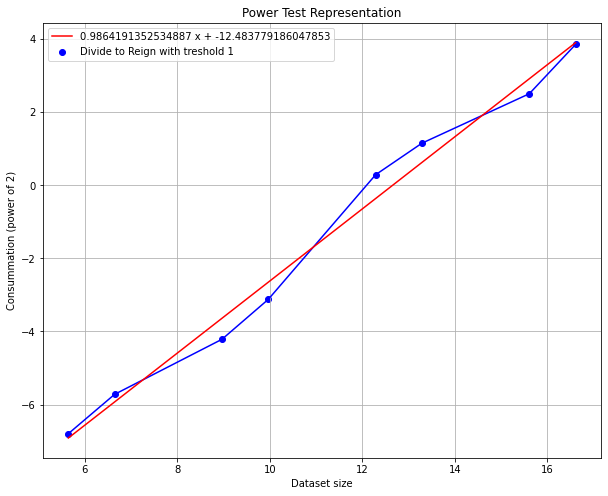

In [117]:
perform_power_test(x_exp=SIZES, y_exp=list_time_divide_to_reign_1, label='Divide to Reign with treshold 1')

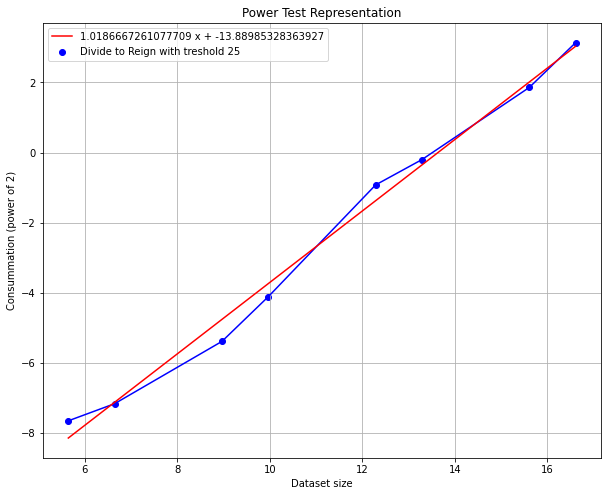

In [118]:
perform_power_test(x_exp=SIZES, y_exp=list_time_divide_to_reign_2, label='Divide to Reign with treshold '+ str(THRESHOLD))

## Ratio Test

In [155]:
def perform_ratio_test(x_exp, y_exp, label):
    
    # Compute ratios
    x = np.array(x_exp)
    y = np.array(y_exp)
    
    y_plot_power_nlog = y/ (x *np.log(x))
    y_plot_power_1 = y/x
    y_plot_power_2 = abs(y/(x**2))
    
    # Plot data
    plt.figure(figsize=(10,8))
    plt.xscale("log", basex=2)
    plt.yscale("log", basey=2)
    
    # Plot ratio
    plt.plot(x, y_plot_power_1, color='coral', label='Ratio : y / x')
    plt.plot(x, y_plot_power_nlog, color='orange', label='Ratio : y / xlog(x)')
    plt.plot(x, y_plot_power_2, color='red', label='Ratio : y / (x^2)')

    plt.title("Ratio Test Representation (" + label + ")")
    plt.xlabel("Dataset size")
    plt.ylabel("Consummation Ratio")
    plt.legend()
    plt.grid()
    plt.show()
    
    return y/(x**2)

C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]
C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


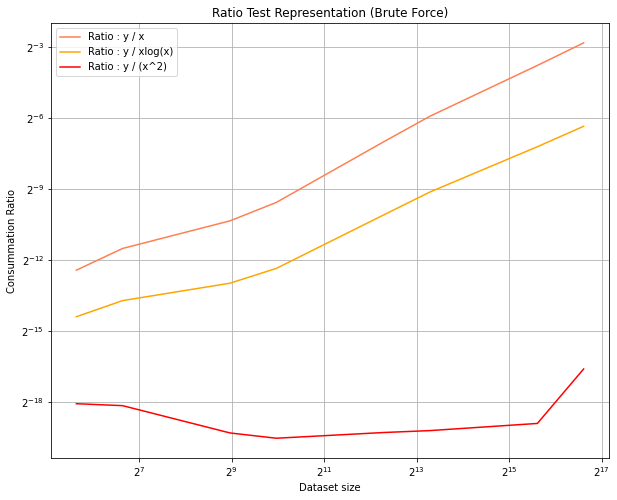

array([ 3.58991623e-06,  3.39107513e-06,  1.52391434e-06,  1.30550575e-06,
        1.54368172e-06,  1.63281273e-06, -2.01346530e-06,  9.92397912e-06])

In [156]:
perform_ratio_test(x_exp=SIZES, y_exp=list_time_brute_force, label="Brute Force")   

C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]
C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


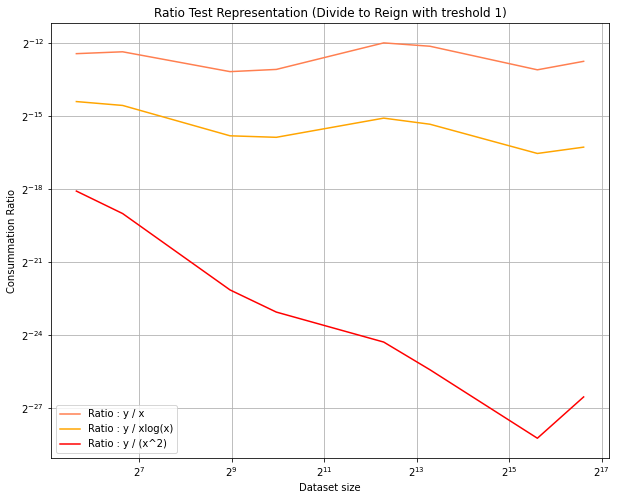

array([ 3.59373093e-06,  1.89468861e-06,  2.15424538e-07,  1.14693403e-07,
        4.88295460e-08,  2.21924067e-08, -3.15985752e-09,  1.02434303e-08])

In [157]:
perform_ratio_test(x_exp=SIZES, y_exp=list_time_divide_to_reign_1, label='Divide to Reign with treshold 1')

C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  del sys.path[0]
C:\Users\alexa\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


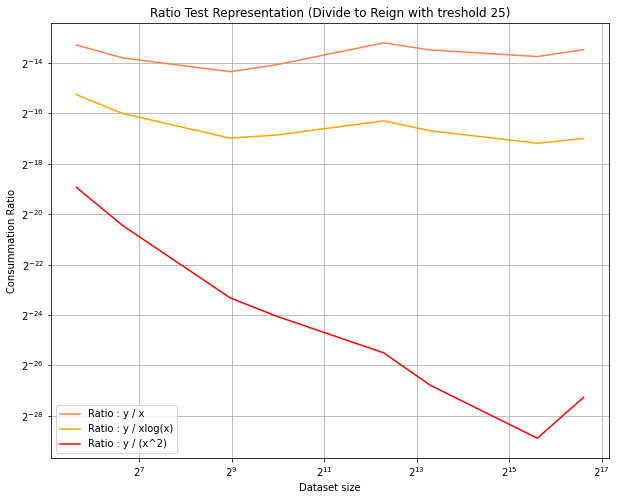

array([ 1.99184418e-06,  6.98256493e-07,  9.57450867e-08,  5.78453541e-08,
        2.11033440e-08,  8.69667530e-09, -2.01746292e-09,  6.21856730e-09])

In [158]:
perform_ratio_test(x_exp=SIZES, y_exp=list_time_divide_to_reign_2, label='Divide to Reign with treshold '+ str(THRESHOLD))

## Constant Test

In [199]:
def perform_constant_test(x_exp, y_exp, label, function, function_title='f(x)'):
    
    vectorized_function = np.vectorize(function) 
    
    # solve linear system
    x = np.array(x_exp, dtype=np.int64)
    y = np.array(y_exp, dtype=np.int64)
    
    
    x_base_function = vectorized_function(x)
    A = np.vstack([x_base_function, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    
    x_plot = np.linspace(min(x_exp), max(x_exp), 100)
    y_plot = m * vectorized_function(x_plot) + c
    
    # Plot data
    plt.figure(figsize=(10,8))
#     plt.xscale("log")
#     plt.yscale("log")
    
    # Experimental data
    plt.plot(x_exp, y_exp, color='blue')
    plt.scatter(x_exp, y_exp, color='blue', label=label)
    
    # Fit linear
    plt.plot(x_plot, y_plot, color='red', label=str(m) + ' f(x) + ' + str(c) + ' (' + function_title+ ')')
    

    plt.title("Power Test Representation")
    plt.xlabel("Dataset size")
    plt.ylabel("Consummation (power of 10)")
    plt.legend()
    plt.grid()
    plt.show()

In [204]:
# Funtions
def power_1(x):
    return x * np.log2(x)

def power_2(x):
    return x**2

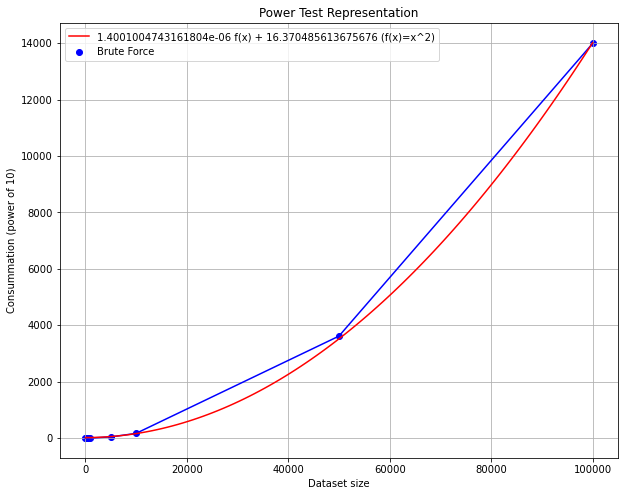

In [205]:
# We have reasons to believe that the function is of the order O(n^2)
perform_constant_test(x_exp=SIZES, y_exp=list_time_brute_force, label="Brute Force", function=power_2, function_title='f(x)=x^2')

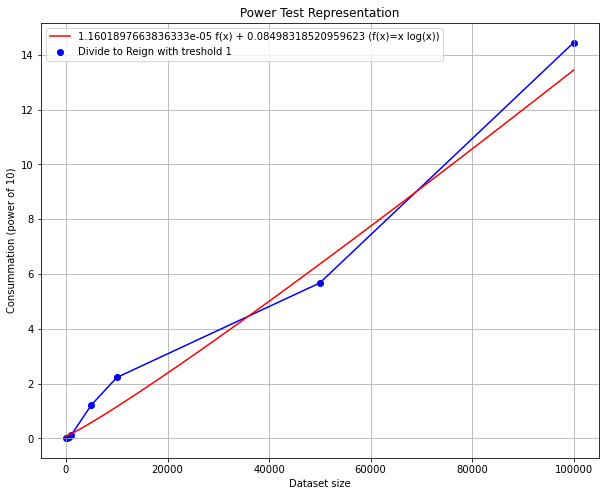

In [206]:
# We have reasons to believe that the function is of the order O(n)
perform_constant_test(x_exp=SIZES, y_exp=list_time_divide_to_reign_1, label='Divide to Reign with treshold 1', function=power_1_log_n, function_title='f(x)=x log(x)')

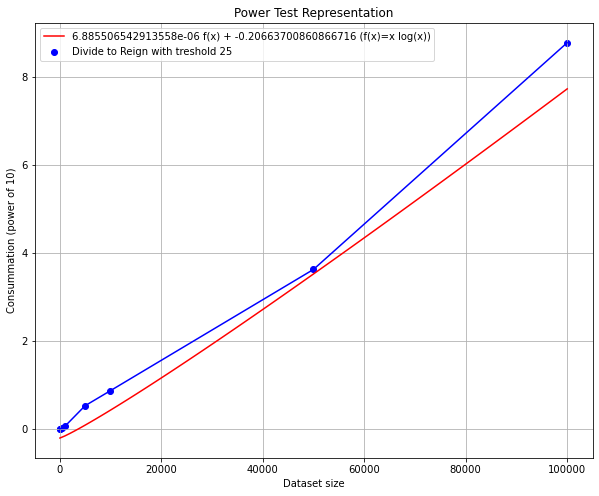

In [207]:
# We have reasons to believe that the function is of the order O(n)
perform_constant_test(x_exp=SIZES, y_exp=list_time_divide_to_reign_2, label='Divide to Reign with treshold '+ str(THRESHOLD), function=power_1_log_n, function_title='f(x)=x log(x)')

# Seuil de récursivité

# Script to generate python script

In [2]:
!jupyter nbconvert --to script solution_tp2.ipynb

[NbConvertApp] Converting notebook solution_tp2.ipynb to script
[NbConvertApp] Writing 24236 bytes to solution_tp2.py
